#### Import the Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset

In [3]:
df = pd.read_excel('cust_data.xlsx')
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [5]:
df1 = df.copy()

In [8]:
df.shape
# rows = 30K ,cols=38

(30000, 38)

#### Data Preprocessing

#### 1) Handling Null Values

In [9]:
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [10]:
df['Gender'].value_counts()

F    22054
M     5222
Name: Gender, dtype: int64

In [11]:
df['Gender'].fillna('Other',inplace=True)
df.isnull().sum()

Cust_ID                   0
Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft           

#### 2) Handle Dupliacates

In [12]:
df.duplicated().sum()

0

In [13]:
df.columns

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft'],
      dtype='object')

In [14]:
df.dtypes

Cust_ID                    int64
Gender                    object
Orders                     int64
Jordan                     int64
Gatorade                   int64
Samsung                    int64
Asus                       int64
Udis                       int64
Mondelez International     int64
Wrangler                   int64
Vans                       int64
Fila                       int64
Brooks                     int64
H&M                        int64
Dairy Queen                int64
Fendi                      int64
Hewlett Packard            int64
Pladis                     int64
Asics                      int64
Siemens                    int64
J.M. Smucker               int64
Pop Chips                  int64
Juniper                    int64
Huawei                     int64
Compaq                     int64
IBM                        int64
Burberry                   int64
Mi                         int64
LG                         int64
Dior                       int64
Scabal    

#### EDA

#### Q) Find gender wise most searched brand

In [36]:
a1 = df.iloc[:,1:].groupby(['Gender']).max().T
# a1 = a1.sort_values(by=['F','M','Other'],ascending=False)
a1_m = a1.sort_values('M',ascending=False).head(1)
a1_f = a1.sort_values('F',ascending=False).head(1)
a1_o = a1.sort_values('Other',ascending=False).head(1)

a1_res = pd.concat([a1_m,a1_f,a1_o]).T
a1_res

,Juniper,Dairy Queen,J.M. Smucker
Gender,,,
F,79,114,27
M,52,16,21
Other,36,13,64


In [21]:
a2 = df.iloc[:,1:].groupby(['Gender']).max()
a2

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Gender,,,,,,,,,,,,,,,,,,,,,
F,12,24,11,27,17,14,31,9,6,13,...,16,12,11,8,9,8,22,14,8,16
M,12,9,15,22,2,8,8,5,16,15,...,19,11,4,5,5,3,14,9,8,10
Other,12,9,9,13,10,6,8,8,7,12,...,4,9,7,8,5,4,22,4,6,5


In [37]:
# a2.columns

In [31]:
a2.iloc[:,1:].max(axis=1)

Gender
F        114
M         52
Other     64
dtype: int64

In [38]:
df.columns

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft'],
      dtype='object')

In [40]:
df.iloc[:,1:].describe()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,0.094267,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,0.531592,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,15.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [43]:
df['Order_Bins'] = pd.cut(df['Orders'],bins=[0,2,4,6,8,10,12])
df['Order_Bins'].value_counts()

(0, 2]      5138
(2, 4]      4391
(6, 8]      4287
(4, 6]      4049
(8, 10]     3931
(10, 12]     910
Name: Order_Bins, dtype: int64

In [48]:
df.iloc[:,3:].groupby(['Order_Bins']).mean()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Order_Bins,,,,,,,,,,,,,,,,,,,,,
"(0, 2]",0.285520,0.246789,0.232386,0.161541,0.150837,0.145582,0.115998,0.116388,0.101791,0.148112,...,0.113858,0.304009,0.373297,0.164656,0.086415,0.063060,0.197742,0.118918,0.094784,0.070261
"(2, 4]",0.287406,0.279663,0.235026,0.165110,0.143931,0.147119,0.112503,0.112275,0.086768,0.139148,...,0.099294,0.263038,0.376224,0.152357,0.085857,0.063084,0.194489,0.122296,0.094739,0.072876
"(4, 6]",0.291924,0.277352,0.250432,0.175599,0.150161,0.150408,0.111879,0.115584,0.092122,0.133613,...,0.086688,0.279081,0.381329,0.159052,0.081008,0.056063,0.191405,0.128674,0.088664,0.069400
"(6, 8]",0.286214,0.268253,0.214602,0.176114,0.150688,0.139258,0.108467,0.127828,0.088407,0.140425,...,0.096338,0.278983,0.386284,0.163751,0.081642,0.059949,0.192676,0.114299,0.088873,0.064381
"(8, 10]",0.270160,0.285424,0.256423,0.169168,0.149071,0.152633,0.107861,0.105317,0.085983,0.163826,...,0.103790,0.275248,0.404986,0.163572,0.072246,0.053167,0.199440,0.127703,0.095396,0.066141
"(10, 12]",0.240659,0.245055,0.212088,0.174725,0.139560,0.108791,0.097802,0.113187,0.100000,0.134066,...,0.113187,0.271429,0.317582,0.145055,0.067033,0.045055,0.198901,0.112088,0.087912,0.079121


In [50]:
df.drop('Cust_ID',axis=1,inplace=True)
df.columns

Index(['Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft',
       'Order_Bins'],
      dtype='object')

#### Outlier Treatment

In [51]:
df.describe(percentiles=[0.01,0.02,0.03,0.04,0.05]).T

,count,mean,std,min,1%,2%,3%,4%,5%,50%,max
Orders,30000.0,4.169800,3.590311,0.0,0.0,0.0,0.0,0.0,0.0,4.0,12.0
Jordan,30000.0,0.267433,0.804778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
Gatorade,30000.0,0.252333,0.705368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
Samsung,30000.0,0.222933,0.917494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0
Asus,30000.0,0.161333,0.740038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
Udis,30000.0,0.143533,0.641258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
Mondelez International,30000.0,0.139767,0.525840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0
Wrangler,30000.0,0.106933,0.515921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
Vans,30000.0,0.111433,0.547990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
Fila,30000.0,0.094267,0.531592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0


In [52]:
df.describe(percentiles=[0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,50%,95%,96%,97%,98%,99%,max
Orders,30000.0,4.169800,3.590311,0.0,4.0,10.0,10.0,11.0,11.00,12.0,12.0
Jordan,30000.0,0.267433,0.804778,0.0,0.0,2.0,2.0,2.0,3.00,4.0,24.0
Gatorade,30000.0,0.252333,0.705368,0.0,0.0,2.0,2.0,2.0,2.00,3.0,15.0
Samsung,30000.0,0.222933,0.917494,0.0,0.0,1.0,2.0,2.0,3.00,5.0,27.0
Asus,30000.0,0.161333,0.740038,0.0,0.0,1.0,1.0,2.0,2.00,4.0,17.0
Udis,30000.0,0.143533,0.641258,0.0,0.0,1.0,1.0,1.0,2.00,3.0,14.0
Mondelez International,30000.0,0.139767,0.525840,0.0,0.0,1.0,1.0,1.0,2.00,2.0,31.0
Wrangler,30000.0,0.106933,0.515921,0.0,0.0,1.0,1.0,1.0,2.00,3.0,9.0
Vans,30000.0,0.111433,0.547990,0.0,0.0,1.0,1.0,1.0,2.00,2.0,16.0
Fila,30000.0,0.094267,0.531592,0.0,0.0,1.0,1.0,1.0,1.00,3.0,15.0


In [53]:
def outlier_treatment(x):
    x = x.clip(upper = x.quantile(0.99))
    return x

In [54]:
cols_with_outliers = df.columns[1:]
cols_with_outliers

Index(['Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft',
       'Order_Bins'],
      dtype='object')

In [55]:
df[cols_with_outliers] = df[cols_with_outliers].apply(outlier_treatment)

In [56]:
df.describe(percentiles=[0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,50%,95%,96%,97%,98%,99%,max
Orders,30000.0,4.169800,3.590311,0.0,4.0,10.0,10.0,11.0,11.00,12.0,12.0
Jordan,30000.0,0.252933,0.684086,0.0,0.0,2.0,2.0,2.0,3.00,4.0,4.0
Gatorade,30000.0,0.236633,0.602647,0.0,0.0,2.0,2.0,2.0,2.00,3.0,3.0
Samsung,30000.0,0.203533,0.737106,0.0,0.0,1.0,2.0,2.0,3.00,5.0,5.0
Asus,30000.0,0.143133,0.573693,0.0,0.0,1.0,1.0,2.0,2.00,4.0,4.0
Udis,30000.0,0.123667,0.471643,0.0,0.0,1.0,1.0,1.0,2.00,3.0,3.0
Mondelez International,30000.0,0.125333,0.393400,0.0,0.0,1.0,1.0,1.0,2.00,2.0,2.0
Wrangler,30000.0,0.096733,0.424714,0.0,0.0,1.0,1.0,1.0,2.00,3.0,3.0
Vans,30000.0,0.088000,0.349180,0.0,0.0,1.0,1.0,1.0,2.00,2.0,2.0
Fila,30000.0,0.081333,0.389260,0.0,0.0,1.0,1.0,1.0,1.00,3.0,3.0


In [62]:
df.drop(['Order_Bins'],axis=1,inplace=True)
df.columns

Index(['Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft'],
      dtype='object')

In [64]:
data = df.iloc[:,1:]
data.head(3)

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Standardization

In [57]:
from sklearn.preprocessing import StandardScaler

In [65]:
print(data.shape)

(30000, 36)


In [66]:
sc = StandardScaler()
data_sc = sc.fit_transform(data)
print(type(data_sc))
print(data_sc.shape)

<class 'numpy.ndarray'>
(30000, 36)


#### Elbow Method

In [69]:
from sklearn.cluster import KMeans

WCSS
 [1080000.0000000012, 1020102.4122684754, 988305.1983214116, 957193.5170815974, 928363.8835380995, 906820.7921704231, 880911.9356108725, 866838.0599676301, 845958.5570548489, 828002.5662859397, 811883.5529124078, 794983.6232458511, 780454.1274017537, 765786.2978282069]


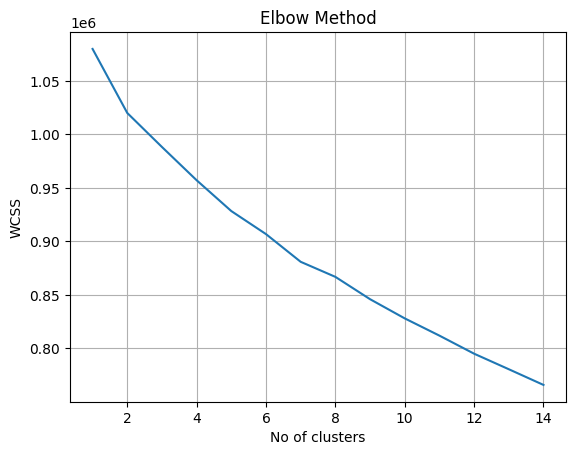

In [70]:
wcss = []
for i in range(1,15): # i = no of clusters,
    m = KMeans(n_clusters=i,random_state=0)
    m.fit(data_sc)
    wcss.append(m.inertia_)

print('WCSS\n',wcss)

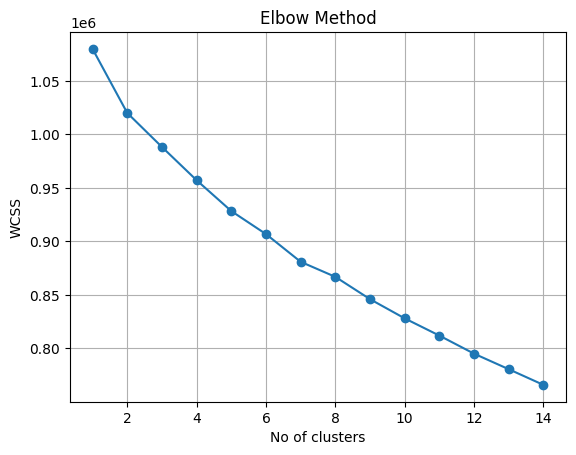

In [71]:
plt.plot(list(range(1,15)),wcss,marker='o')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid()
plt.show()

#### Elbow Method on data (non standardized)

In [72]:
wcss1 = []
for i in range(1,12): # i = no of clusters,
    m = KMeans(n_clusters=i,random_state=0)
    m.fit(data)
    wcss1.append(m.inertia_)

print('WCSS\n',wcss1)

WCSS
 [709585.0647333326, 407690.48447702464, 359374.79799017793, 342801.7513922415, 328587.7183461329, 320269.07103065844, 312970.3554185341, 306351.2269442083, 300283.38147117104, 295366.13471110584, 289990.4079926845]


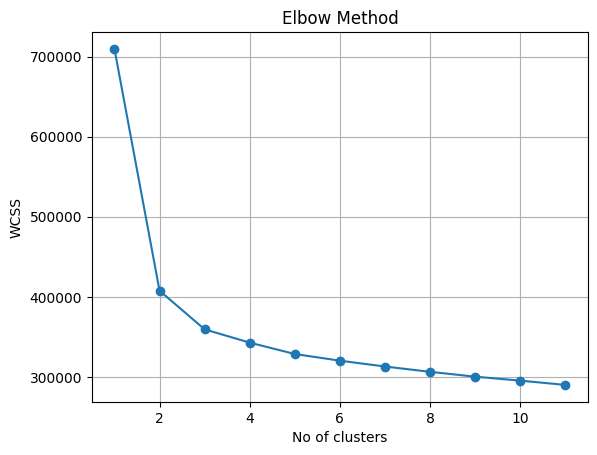

In [73]:
plt.plot(list(range(1,12)),wcss1,marker='o')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid()
plt.show()

In [74]:
from sklearn.metrics import silhouette_score

In [75]:
for i in range(2,10): # i = no of clusters
    m = KMeans(n_clusters=i,random_state=0).fit(data)
    print(f'Silhoutte Score at K={i}',silhouette_score(data,m.labels_))

Silhoutte Score at K=2 0.36861902304223737
Silhoutte Score at K=3 0.22611071851223624
Silhoutte Score at K=4 0.1491850420859772
Silhoutte Score at K=5 0.16891887709484743
Silhoutte Score at K=6 0.14782698101782285
Silhoutte Score at K=7 0.1393136071800743
Silhoutte Score at K=8 0.14320048182913764
Silhoutte Score at K=9 0.11095300182171325


#### Optimal Number of Clusters = 2,3 or 4

#### Applying KMeans at K=2

In [76]:
k2 = KMeans(n_clusters=2)
k2.fit(data)

KMeans(n_clusters=2)

In [77]:
ypred_k2 = k2.predict(data)
print(ypred_k2)

[0 1 0 ... 1 1 1]


In [78]:
from collections import Counter

In [79]:
Counter(ypred_k2)

Counter({1: 16823, 0: 13177})

In [80]:
cent2 = k2.cluster_centers_
print(cent2)

[[7.75358579 0.26766335 0.2546862  0.21499583 0.15519466 0.12817789
  0.12825378 0.0990362  0.091599   0.07922896 0.13432496 0.34355316
  0.1787205  0.13273127 0.15299385 0.09584883 0.28845716 0.04287774
  0.76557638 0.23844578 0.43712529 0.24853912 0.10161645 0.01866889
  0.42194733 0.12112013 0.08203688 0.26333763 0.38142218 0.14851635
  0.06989451 0.04431965 0.18236321 0.11087501 0.08279578 0.05828337]
 [1.36271771 0.24139571 0.22249302 0.19455507 0.13368603 0.12013315
  0.12304583 0.09492956 0.085181   0.08298163 0.12661238 0.29768769
  0.18129941 0.11757713 0.14111633 0.09611841 0.25780182 0.039232
  0.70272841 0.22070974 0.42489449 0.23533258 0.09421625 0.0219937
  0.39511383 0.11323783 0.09183855 0.25066873 0.35445521 0.14141354
  0.06853712 0.04571123 0.17773287 0.10319206 0.07751293 0.06348452]]


In [82]:
print(k2.max_iter)

300


In [94]:
data1 = data.copy()
data2 = data.copy()

In [93]:
r1 = data.mean().reset_index().T
r1.columns = r1.loc['index']
r1 = r1.iloc[1:,]
r1.index = ['Mean']
r1

index,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Mean,4.1698,0.252933,0.236633,0.203533,0.143133,0.123667,0.125333,0.096733,0.088,0.081333,...,0.087533,0.256233,0.3663,0.144533,0.069133,0.0451,0.179767,0.106567,0.079833,0.0612


In [95]:
data['Cls2'] = ypred_k2
data.head(3)

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cls2
0,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [96]:
r2 = data.groupby('Cls2').mean()
r2

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cls2,,,,,,,,,,,,,,,,,,,,,
0,7.753586,0.267663,0.254686,0.214996,0.155195,0.128178,0.128254,0.099036,0.091599,0.079229,...,0.082037,0.263338,0.381422,0.148516,0.069895,0.044320,0.182363,0.110875,0.082796,0.058283
1,1.362718,0.241396,0.222493,0.194555,0.133686,0.120133,0.123046,0.094930,0.085181,0.082982,...,0.091839,0.250669,0.354455,0.141414,0.068537,0.045711,0.177733,0.103192,0.077513,0.063485


In [97]:
cluster2_analysis = pd.concat([r1,r2])
cluster2_analysis

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Mean,4.1698,0.252933,0.236633,0.203533,0.143133,0.123667,0.125333,0.096733,0.088,0.081333,...,0.087533,0.256233,0.3663,0.144533,0.069133,0.0451,0.179767,0.106567,0.079833,0.0612
0,7.753586,0.267663,0.254686,0.214996,0.155195,0.128178,0.128254,0.099036,0.091599,0.079229,...,0.082037,0.263338,0.381422,0.148516,0.069895,0.04432,0.182363,0.110875,0.082796,0.058283
1,1.362718,0.241396,0.222493,0.194555,0.133686,0.120133,0.123046,0.09493,0.085181,0.082982,...,0.091839,0.250669,0.354455,0.141414,0.068537,0.045711,0.177733,0.103192,0.077513,0.063485


In [98]:
cluster2_analysis.T

,Mean,0,1
Orders,4.1698,7.753586,1.362718
Jordan,0.252933,0.267663,0.241396
Gatorade,0.236633,0.254686,0.222493
Samsung,0.203533,0.214996,0.194555
Asus,0.143133,0.155195,0.133686
Udis,0.123667,0.128178,0.120133
Mondelez International,0.125333,0.128254,0.123046
Wrangler,0.096733,0.099036,0.09493
Vans,0.088,0.091599,0.085181
Fila,0.081333,0.079229,0.082982


In [105]:
def K_cluster_analysis(k,table):
    model = KMeans(n_clusters=k,random_state=0)
    model.fit(table)
    ypred = model.predict(table)
    print(Counter(ypred))
    cent = model.cluster_centers_
    table[f'Cls{k}'] = ypred
    r1 = table.drop(f'Cls{k}',axis=1).mean().reset_index().T
    r1.columns = r1.loc['index']
    r1 = r1.iloc[1:,]
    r1.index = ['Mean']
    r2 = table.groupby(f'Cls{k}').mean()
    cls_analysis = pd.concat([r1,r2])
    return cls_analysis

In [106]:
cls3_report = K_cluster_analysis(3,data2)
cls3_report.T

Counter({2: 12432, 1: 9128, 0: 8440})


,Mean,0,1,2
Orders,4.1698,4.460782,8.751643,0.608108
Jordan,0.252933,0.269076,0.264351,0.233591
Gatorade,0.236633,0.260545,0.253615,0.207931
Samsung,0.203533,0.222512,0.210232,0.18573
Asus,0.143133,0.150948,0.155237,0.128941
Udis,0.123667,0.127962,0.127739,0.117761
Mondelez International,0.125333,0.13128,0.12741,0.119772
Wrangler,0.096733,0.100829,0.09816,0.092905
Vans,0.088,0.091114,0.090162,0.084299
Fila,0.081333,0.079384,0.077673,0.085344


In [108]:
cls4_report = K_cluster_analysis(4,data2)
cls4_report.T

Counter({1: 12432, 0: 6401, 2: 6326, 3: 4841})


,Mean,0,1,2,3
Orders,4.1698,3.970473,0.608108,7.006481,9.873167
Jordan,0.252933,0.270114,0.233591,0.270787,0.256559
Gatorade,0.236633,0.268552,0.207931,0.243598,0.259037
Samsung,0.203533,0.215748,0.18573,0.209611,0.22516
Asus,0.143133,0.151539,0.128941,0.152861,0.155753
Udis,0.123667,0.12873,0.117761,0.127569,0.12704
Mondelez International,0.125333,0.132636,0.119772,0.124723,0.130758
Wrangler,0.096733,0.103265,0.092905,0.098008,0.096261
Vans,0.088,0.095454,0.084299,0.08963,0.08552
Fila,0.081333,0.078581,0.085344,0.079987,0.07643


In [102]:
cls4_report.T[:-1]

,Mean,0,1,2,3
Orders,4.1698,9.873167,0.608108,3.970473,7.006481
Jordan,0.252933,0.256559,0.233591,0.270114,0.270787
Gatorade,0.236633,0.259037,0.207931,0.268552,0.243598
Samsung,0.203533,0.22516,0.18573,0.215748,0.209611
Asus,0.143133,0.155753,0.128941,0.151539,0.152861
Udis,0.123667,0.12704,0.117761,0.12873,0.127569
Mondelez International,0.125333,0.130758,0.119772,0.132636,0.124723
Wrangler,0.096733,0.096261,0.092905,0.103265,0.098008
Vans,0.088,0.08552,0.084299,0.095454,0.08963
Fila,0.081333,0.07643,0.085344,0.078581,0.079987


In [104]:
data1.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cls3,Cls4
0,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,3
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,10,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,1,0
